In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [ ]:
from keras.datasets import cifar10
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_test.shape

(10000, 1)

[9]


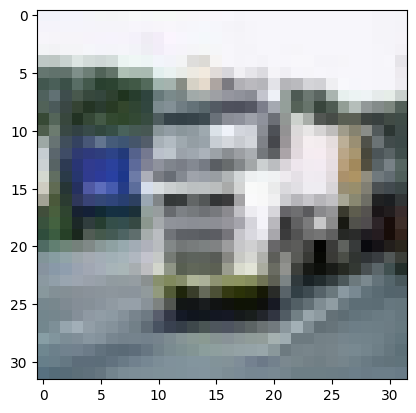

In [ ]:
# Visualisation of the Data
index = 1000
plt.imshow(X_train[index])
print(y_train[index])

[3]


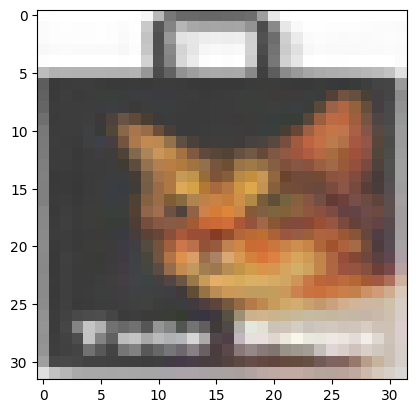

In [ ]:
# Trying for different indecies for different classes
index = 3000
plt.imshow(X_train[index])
print(y_train[index])

[8]


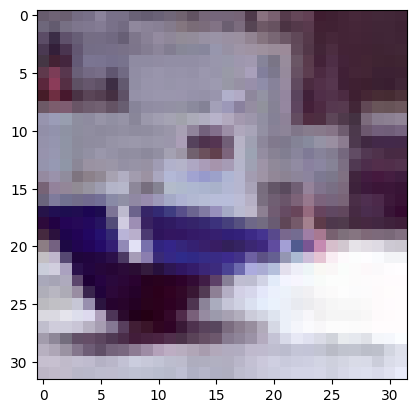

In [ ]:
index = 3056
plt.imshow(X_train[index])
print(y_train[index])

[0]


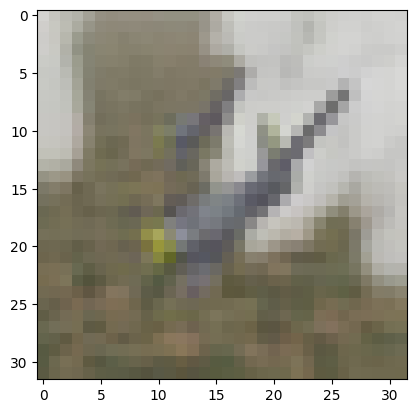

In [ ]:
index = 2233
plt.imshow(X_train[index])
print(y_train[index])

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


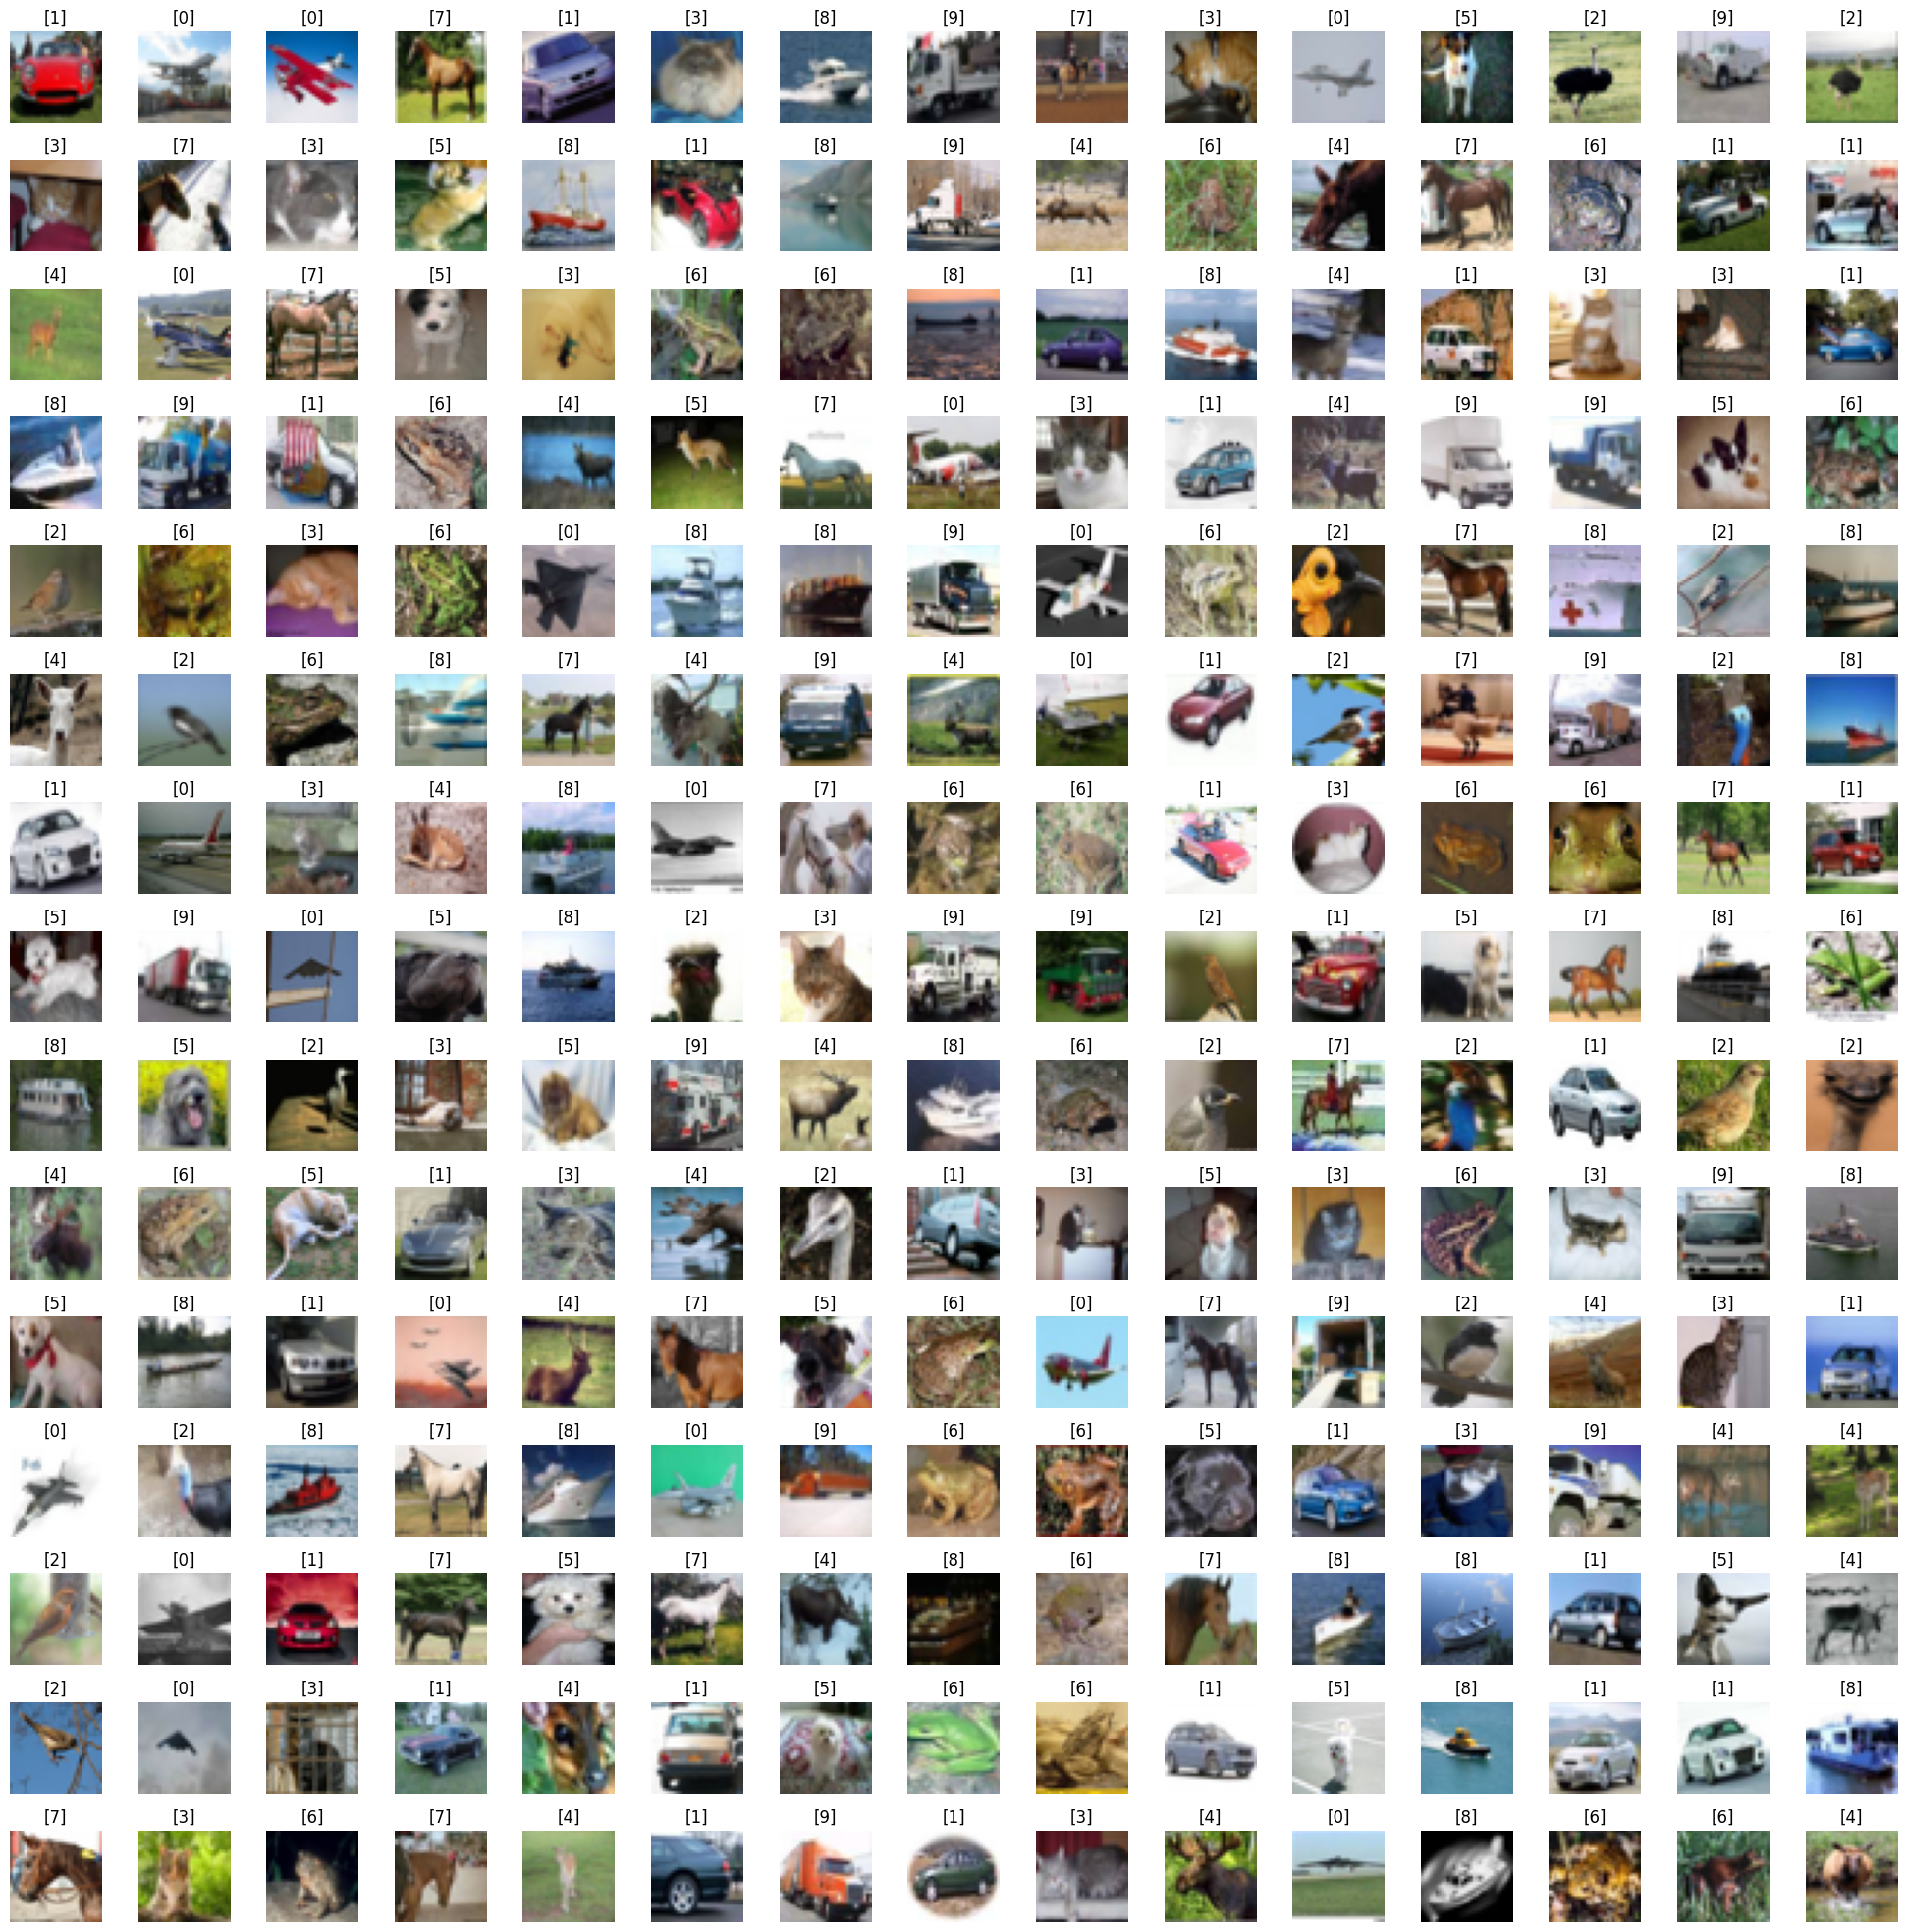

In [ ]:
W_grid = 15
L_grid = 15
fig, axes = plt.subplots(L_grid,W_grid,figsize=(25,25))
axes = axes.ravel()

n_training = len(X_train)

# Plot the image
for i in np.arange(0,L_grid*W_grid):
  index = np.random.randint(0,n_training)# pick random number
  axes[i].imshow(X_train[index])
  axes[i].set_title(y_train[index])
  axes[i].axis('off')# To remove the size numbers or size values from the image

plt.subplots_adjust(hspace = 0.4)

In [ ]:
n_training

50000

In [ ]:
# Data Preparation
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
number_cat = 10

In [ ]:
import keras
y_train = keras.utils.to_categorical(y_train,number_cat)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [ ]:
y_test = keras.utils.to_categorical(y_test,number_cat)

In [ ]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
Input_shape = X_train.shape[1:]

In [ ]:
Input_shape

(32, 32, 3)

In [ ]:
# Train the Model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [ ]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3),activation = 'relu',input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3),activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3),activation = 'relu'))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3),activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.2))

cnn_model.add(Flatten())
cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dense(units = 10, activation = 'softmax'))


In [ ]:
cnn_model.compile(loss = 'categorical_crossentropy',optimizer = keras.optimizers.RMSprop(learning_rate = 0.001),metrics = ['accuracy'])

In [ ]:
history = cnn_model.fit(X_train,y_train,batch_size = 32,epochs = 2,shuffle = True)

Epoch 1/2
1563/1563 [==============================] - 161s 102ms/step - loss: 1.5803 - accuracy: 0.4248
Epoch 2/2
1563/1563 [==============================] - 158s 101ms/step - loss: 1.1568 - accuracy: 0.5931


In [ ]:
# Evaluate the Model
evaluation = cnn_model.evaluate(X_test,y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 7s 23ms/step - loss: 0.9628 - accuracy: 0.6608
Test Accuracy: 0.6607999801635742


In [ ]:
predicted_classes = cnn_model.predict(X_test)
predicted_classes = np.argmax(predicted_classes, axis=1)
predicted_classes = predicted_classes.astype(int)
predicted_classes

313/313 [==============================] - 8s 26ms/step


array([3, 8, 8, ..., 5, 0, 7])

In [ ]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:
y_test = y_test.argmax(1)

In [ ]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

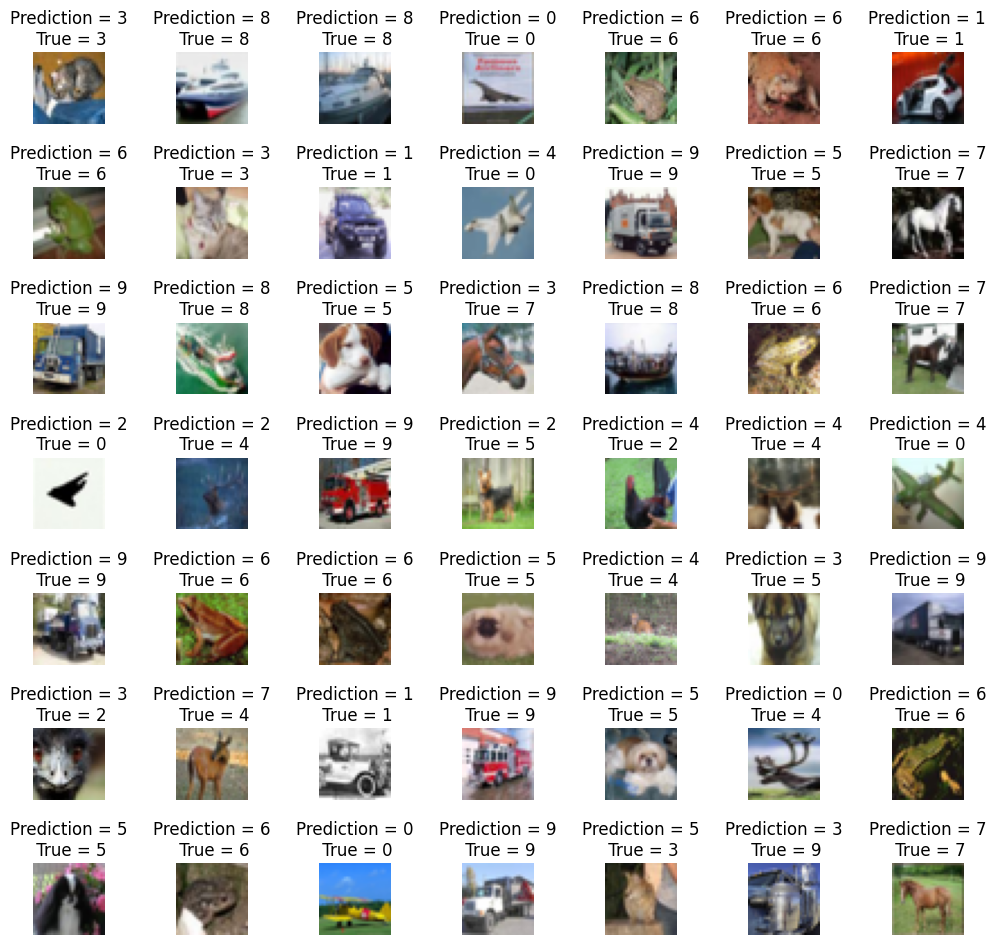

In [ ]:
L = 7
W = 7
fig,axes = plt.subplots(L,W,figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0,L*W):
  axes[i].imshow(X_test[i])
  axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i],y_test[i]))
  axes[i].axis('off')
plt.subplots_adjust(wspace = 1)

<Axes: >

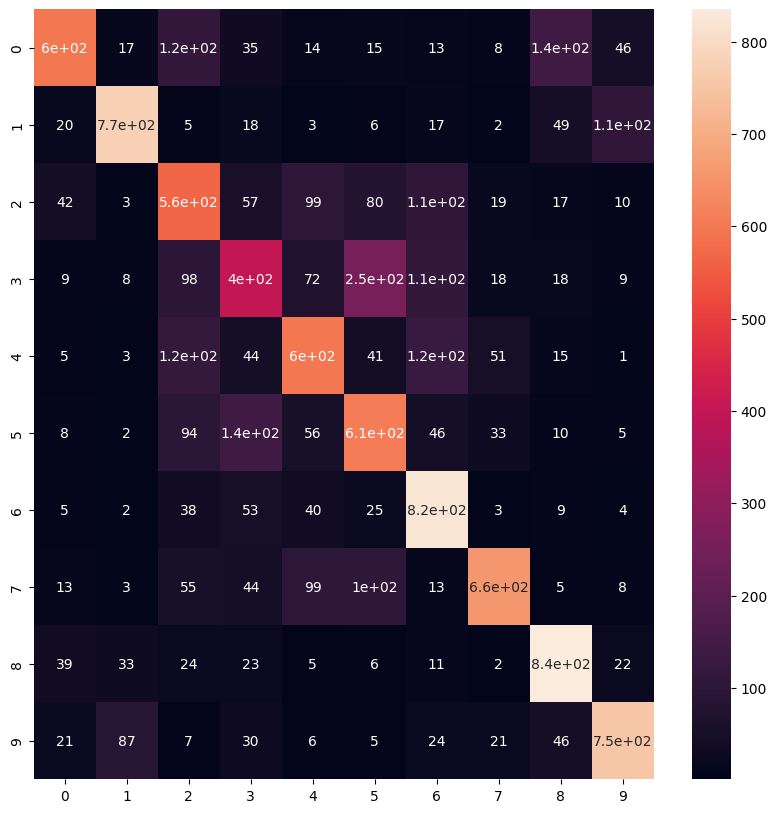

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test,predicted_classes)
cm
plt.figure(figsize = (10,10))
sns.heatmap(cm,annot = True)

In [ ]:
# Saving the model
import os
directory = os.path.join(os.getcwd(),'saved_models')
if not os.path.isdir(directory):
  os.makedirs(directory)
model_path = os.path.join(directory,'keras_cifar10_trained_models.h5')
cnn_model.save(model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
